In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

# Set a more academic-friendly Seaborn style
sns.set(style='ticks', context='paper', font='sans-serif', font_scale=1.5, 
        rc={'axes.labelsize': 16, 'xtick.labelsize': 14, 
            'ytick.labelsize': 14, 'legend.fontsize': 14})

color_palette = {
    'A2C': '#ff7f0e',
    'DDDQN': '#1f77b4',
    'DQN': '#9467bd',
    'Fallback_DDDQN': '#8c564b',
    'AdaptFall_DDDQN': '#a1946a',
    'Hybrid': '#2ca02c',
    'Static': '#d62728',
    'Threshold': '#FFEE58'
}

# Load the datasets (ensure paths are updated to where your files are located)
files = {
    'A2C': 'C:/_source/pesbiu2.0/A2C.xlsx',
    'DDDQN': 'C:/_source/pesbiu2.0/DDDQN.xlsx',
    'DQN': 'C:/_source/pesbiu2.0/DQN.xlsx',
    'Fallback_DDDQN': 'C:/_source/pesbiu2.0/FallDDDQN.xlsx',
    'AdaptFall_DDDQN': 'C:/_source/pesbiu2.0/FallAdaptDDDQN.xlsx',
    'Hybrid': 'C:/_source/pesbiu2.0/hybrid.xlsx',
    'Static': 'C:/_source/pesbiu2.0/static.xlsx',
    'Threshold': 'C:/_source/pesbiu2.0/treshold.xlsx',
}

In [5]:
# Function to read and concatenate data
def read_and_concatenate(files):
    energy_savings = []
    latency_data = []
    throughput_data = []
    overall_metrics = []

    for algorithm, file_path in files.items():
        df = pd.read_excel(file_path)
        
        # Energy Savings
        if {'Avg_Energy_Saving', 'Avg_Energy_Before'}.issubset(df.columns):
            energy_data = df[['Avg_Energy_Saving', 'Avg_Energy_Before']].copy()
            energy_data['Algorithm'] = algorithm
            energy_savings.append(energy_data)
        
        # Latency Data
        if {'Avg_Latency_Before', 'Avg_Latency_After'}.issubset(df.columns):
            latency_data_temp = df[['Avg_Latency_Before', 'Avg_Latency_After']].copy()
            latency_data_temp['Algorithm'] = algorithm
            latency_data.append(latency_data_temp)
        
        # Throughput Data
        if {'Avg_Throughput_Before', 'Avg_Throughput_After'}.issubset(df.columns):
            throughput_data_temp = df[['Avg_Throughput_Before', 'Avg_Throughput_After']].copy()
            throughput_data_temp['Algorithm'] = algorithm
            throughput_data.append(throughput_data_temp)
        
        # Overall Metrics
        avg_energy_saving = df['Avg_Energy_Saving'].mean() if 'Avg_Energy_Saving' in df.columns else 0
        avg_latency_after = df['Avg_Latency_After'].mean() if 'Avg_Latency_After' in df.columns else 0
        avg_throughput_after = df['Avg_Throughput_After'].mean() if 'Avg_Throughput_After' in df.columns else 0
        overall_metrics.append({
            'Algorithm': algorithm,
            'Avg_Energy_Saving': avg_energy_saving,
            'Avg_Latency_After': avg_latency_after,
            'Avg_Throughput_After': avg_throughput_after
        })
    
    energy_savings = pd.concat(energy_savings, ignore_index=True) if energy_savings else pd.DataFrame()
    latency_data = pd.concat(latency_data, ignore_index=True) if latency_data else pd.DataFrame()
    throughput_data = pd.concat(throughput_data, ignore_index=True) if throughput_data else pd.DataFrame()
    overall_metrics = pd.DataFrame(overall_metrics)
    
    return energy_savings, latency_data, throughput_data, overall_metrics

# Read and concatenate all data
energy_savings, latency_data, throughput_data, overall_metrics = read_and_concatenate(files)

# Sort the DataFrame by average energy savings in descending order
energy_savings_sorted = energy_savings.groupby('Algorithm').mean().sort_values(by='Avg_Energy_Saving', ascending=False).reset_index()

# Define a function to save plots
def save_plot(fig, filename):
    fig.savefig(filename, format='pdf', bbox_inches='tight', dpi=300)

C:\Users\xkolac15\AppData\Local\Temp\ipykernel_19464\332005369.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=energy_savings_sorted, x='Algorithm', y='Avg_Energy_Saving', ci=None, palette=color_palette, ax=ax)
C:\Users\xkolac15\AppData\Local\Temp\ipykernel_19464\332005369.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=energy_savings_sorted, x='Algorithm', y='Avg_Energy_Saving', ci=None, palette=color_palette, ax=ax)


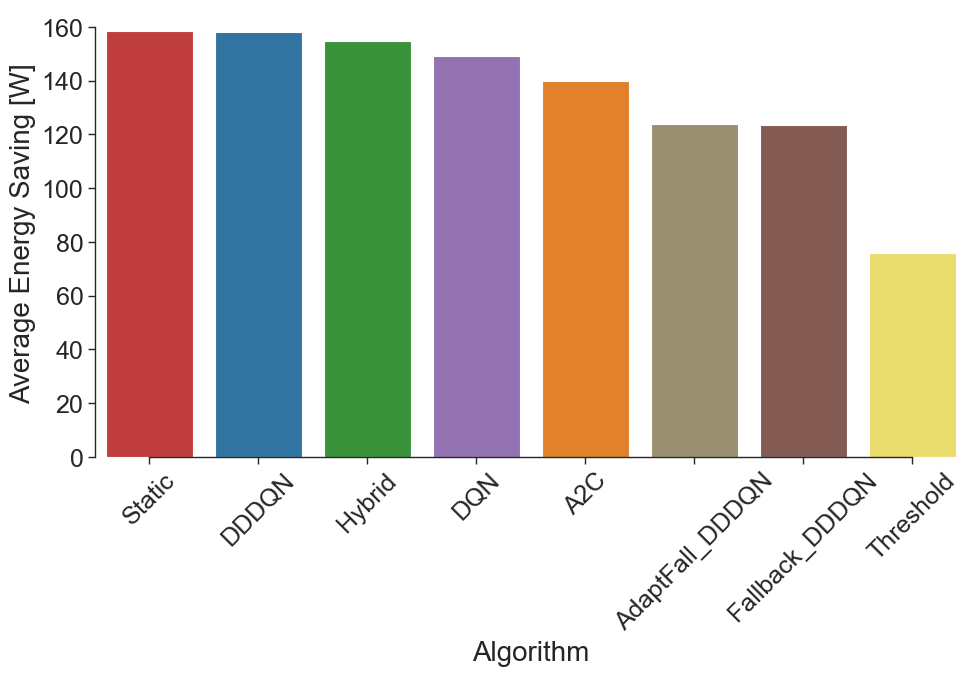

In [7]:
# Plotting the Bar Chart for Average Energy Savings by Algorithm
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=energy_savings_sorted, x='Algorithm', y='Avg_Energy_Saving', ci=None, palette=color_palette, ax=ax)
#ax.set_title('Average Energy Savings by Algorithm in a Week', fontsize=20, pad=15)
ax.set_xlabel('Algorithm', fontsize=20)
ax.set_ylabel('Average Energy Saving [W]', fontsize=20)
ax.tick_params(axis='x', rotation=45, labelsize=18)
ax.tick_params(axis='y', labelsize=18)
sns.despine(trim=True)
plt.tight_layout()
save_plot(fig, 'average_energy_savings.pdf')
plt.show()

C:\Users\xkolac15\AppData\Local\Temp\ipykernel_19464\3931794819.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=energy_savings, x='Algorithm', y='Avg_Energy_Saving', palette=color_palette, ax=ax)


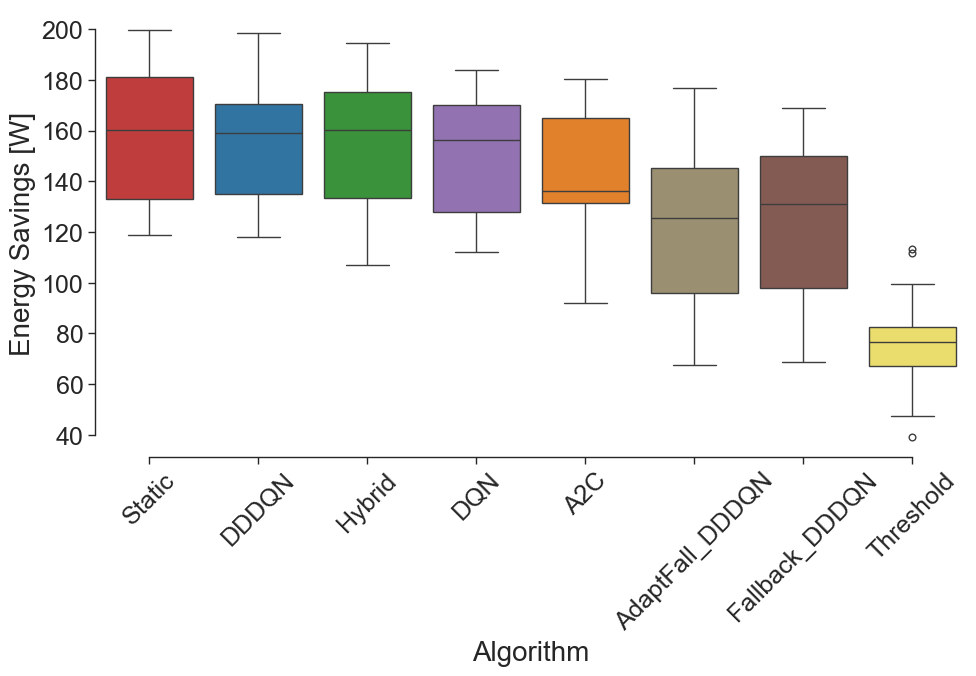

In [8]:
# Plotting the Box Plot for Distribution of Energy Savings by Algorithm
fig, ax = plt.subplots(figsize=(10, 7))
energy_savings['Algorithm'] = pd.Categorical(energy_savings['Algorithm'], categories=energy_savings_sorted['Algorithm'], ordered=True)
sns.boxplot(data=energy_savings, x='Algorithm', y='Avg_Energy_Saving', palette=color_palette, ax=ax)
#ax.set_title('Distribution of Energy Savings by Algorithm in a Week', fontsize=20, pad=15)
ax.set_xlabel('Algorithm', fontsize=20)
ax.set_ylabel('Energy Savings [W]', fontsize=20)
ax.tick_params(axis='x', rotation=45, labelsize=18)
ax.tick_params(axis='y', labelsize=18)
sns.despine(trim=True)
plt.tight_layout()
save_plot(fig, 'distribution_energy_savings.pdf')
plt.show()

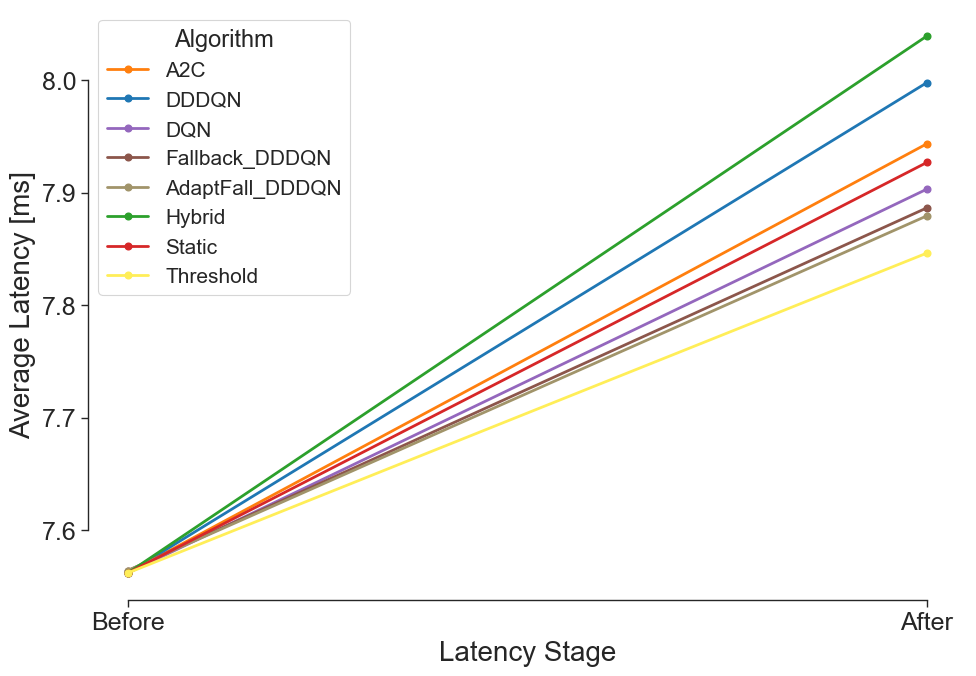

In [9]:
# Plotting Latency Impact Analysis - Line Chart
fig, ax = plt.subplots(figsize=(10, 7))
for algorithm in latency_data['Algorithm'].unique():
    subset = latency_data[latency_data['Algorithm'] == algorithm]
    ax.plot(['Before', 'After'], 
            [subset['Avg_Latency_Before'].mean(), subset['Avg_Latency_After'].mean()], 
            marker='o', label=algorithm, color=color_palette.get(algorithm, 'gray'), linewidth=2)
#ax.set_title('Latency Impact Before and After by Algorithm', fontsize=20, pad=15)
ax.set_xlabel('Latency Stage', fontsize=20)
ax.set_ylabel('Average Latency [ms]', fontsize=20)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(title='Algorithm', fontsize=15, title_fontsize=17, loc='best')
sns.despine(trim=True)
plt.tight_layout()
save_plot(fig, 'latency_impact_analysis.pdf')
plt.show()

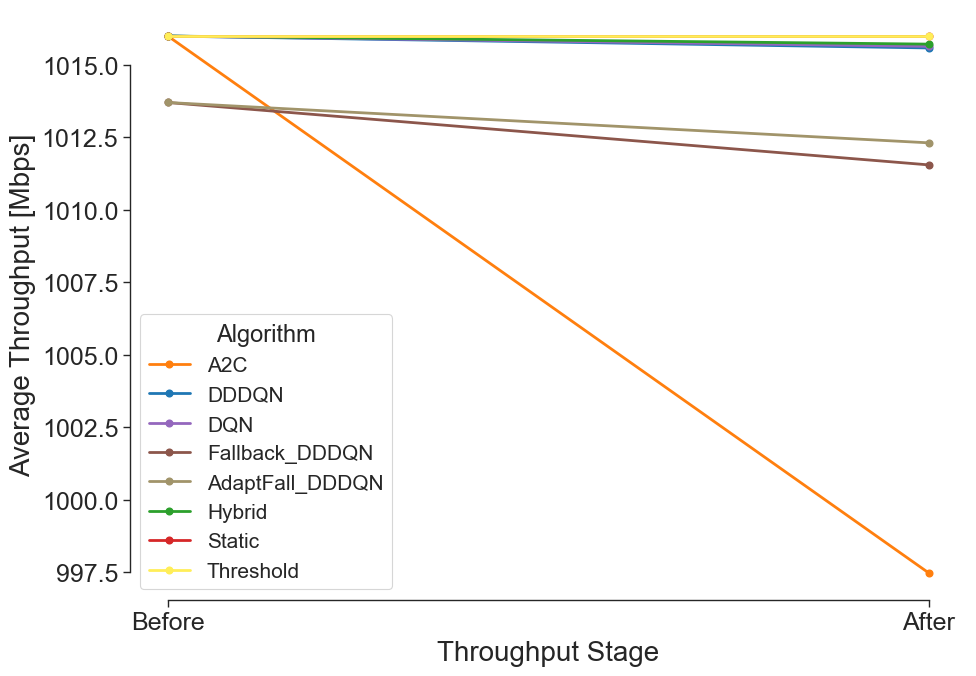

In [10]:
# Plotting Throughput Impact Analysis - Line Chart
fig, ax = plt.subplots(figsize=(10, 7))
for algorithm in throughput_data['Algorithm'].unique():
    subset = throughput_data[throughput_data['Algorithm'] == algorithm]
    ax.plot(['Before', 'After'], 
            [subset['Avg_Throughput_Before'].mean(), subset['Avg_Throughput_After'].mean()], 
            marker='o', label=algorithm, color=color_palette.get(algorithm, 'gray'), linewidth=2)
#ax.set_title('Throughput Before and After by Algorithm', fontsize=20, pad=15)
ax.set_xlabel('Throughput Stage', fontsize=20)
ax.set_ylabel('Average Throughput [Mbps]', fontsize=20)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(title='Algorithm', fontsize=15, title_fontsize=17, loc='best')
sns.despine(trim=True)
plt.tight_layout()
save_plot(fig, 'throughput_impact_analysis.pdf')
plt.show()

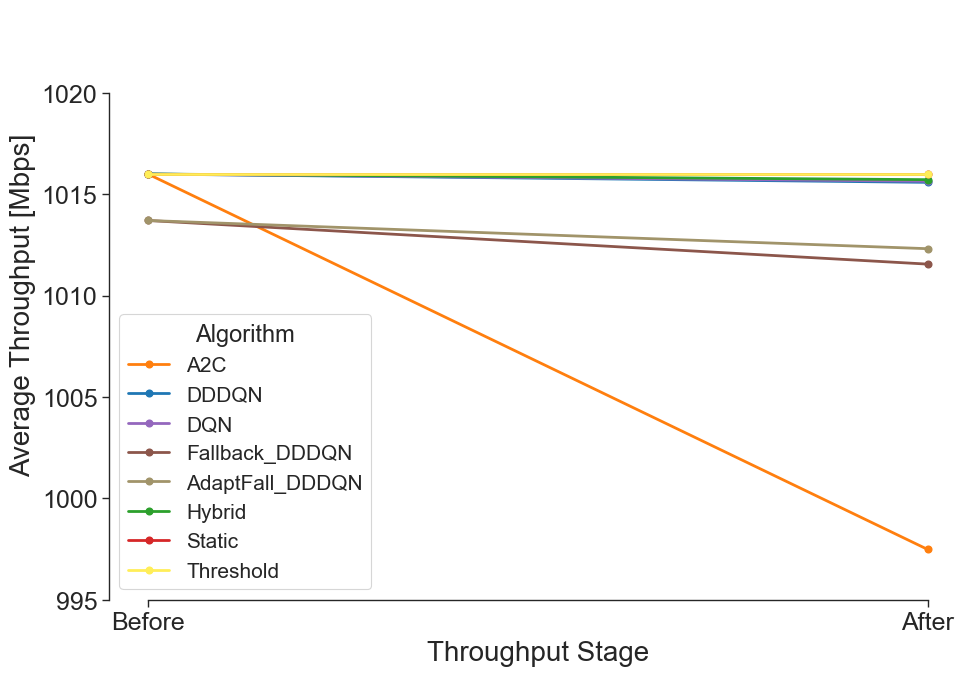

In [11]:
# Plotting Throughput Impact Analysis - Line Chart
fig, ax = plt.subplots(figsize=(10, 7))
max_value = 0
for algorithm in throughput_data['Algorithm'].unique():
    subset = throughput_data[throughput_data['Algorithm'] == algorithm]
    before_mean = subset['Avg_Throughput_Before'].mean()
    after_mean = subset['Avg_Throughput_After'].mean()
    max_value = max(max_value, before_mean, after_mean)
    ax.plot(['Before', 'After'], 
            [before_mean, after_mean], 
            marker='o', 
            label=algorithm, 
            color=color_palette.get(algorithm, 'gray'), 
            linewidth=2)

ax.set_ylim(995, max_value * 1.008)  # Adjust y-axis range
ax.set_xlabel('Throughput Stage', fontsize=20)
ax.set_ylabel('Average Throughput [Mbps]', fontsize=20)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(title='Algorithm', fontsize=15, title_fontsize=17, loc='best')
sns.despine(trim=True)
plt.tight_layout()
save_plot(fig, 'throughput_impact_analysis.pdf')
plt.show()


In [12]:
# Overall Metrics Normalization and Radar Chart
metrics = ['Avg_Energy_Saving', 'Avg_Latency_After', 'Avg_Throughput_After']
normalized_metrics = overall_metrics.copy()

for metric in metrics:
    min_val = overall_metrics[metric].min()
    max_val = overall_metrics[metric].max()
    if metric == 'Avg_Latency_After':
        # For latency, lower is better
        normalized_metrics[metric] = (max_val - overall_metrics[metric]) / (max_val - min_val) if max_val != min_val else 0
    else:
        # For energy saving and throughput, higher is better
        normalized_metrics[metric] = (overall_metrics[metric] - min_val) / (max_val - min_val) if max_val != min_val else 0

# Weight the metrics to emphasize Energy Saving
energy_weight = 2.0
latency_weight = 0.4
throughput_weight = 1.5

normalized_metrics['Avg_Energy_Saving'] *= energy_weight
normalized_metrics['Avg_Latency_After'] *= latency_weight
normalized_metrics['Avg_Throughput_After'] *= throughput_weight

# Add a total score to sort algorithms
normalized_metrics['Total_Score'] = normalized_metrics['Avg_Energy_Saving'] + normalized_metrics['Avg_Latency_After'] + normalized_metrics['Avg_Throughput_After']
normalized_metrics = normalized_metrics.sort_values('Total_Score', ascending=False)


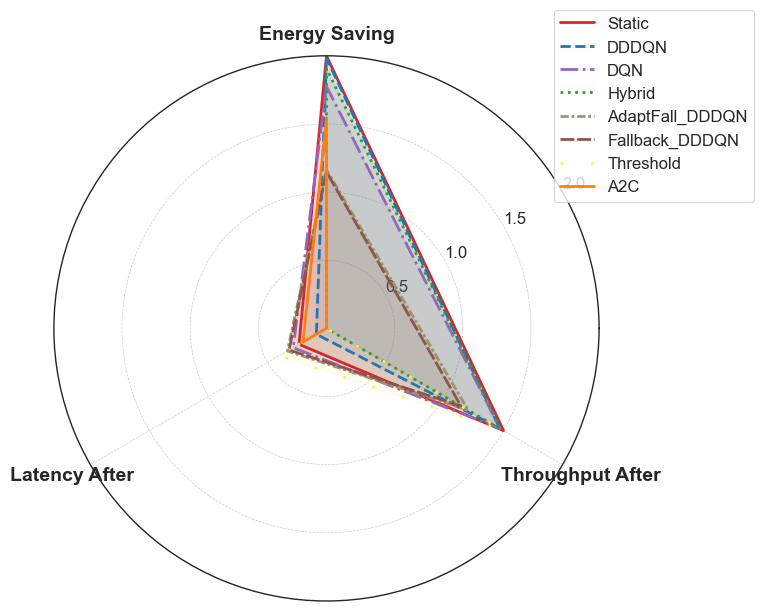

In [13]:
# Radar Chart Setup
categories = metrics
N = len(categories)
angles = [pi/2 + 2*pi*i/N for i in range(N)]
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

# Define line styles and markers for differentiation
line_styles = ['solid', 'dashed', 'dashdot', 'dotted', (0, (3, 1, 1, 1)), (0, (5, 1)), (0, (1, 10))]

for i, (idx, row) in enumerate(normalized_metrics.iterrows()):
    values = row[metrics].tolist()
    values += values[:1]  # Complete the loop
    algorithm = row['Algorithm']
    ax.plot(angles, values, linewidth=2, linestyle=line_styles[i % len(line_styles)], 
            label=algorithm, color=color_palette.get(algorithm, 'gray'))
    ax.fill(angles, values, alpha=0.1, color=color_palette.get(algorithm, 'gray'))

# Customize grid lines and axes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(['Energy Saving', 'Latency After', 'Throughput After'], fontsize=14, fontweight='bold')

# Radial grid customization
ax.yaxis.grid(True, linestyle='--', linewidth=0.5)
ax.xaxis.grid(True, linestyle='--', linewidth=0.5)

# Set y-labels
ax.set_rlabel_position(30)
ax.set_yticks([0.5, 1.0, 1.5, 2.0])
ax.set_yticklabels(['0.5', '1.0', '1.5', '2.0'], fontsize=12)
ax.set_ylim(0, 2.0)

# Add title and legend
#ax.set_title('Overall Efficiency Evaluation by Algorithm', fontsize=20, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)

plt.tight_layout()
save_plot(fig, 'overall_efficiency_evaluation.pdf')
plt.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

# Set a more academic-friendly Seaborn style
sns.set(style='ticks', context='paper', font='sans-serif', font_scale=1.5, 
        rc={'axes.labelsize': 16, 'xtick.labelsize': 14, 
            'ytick.labelsize': 14, 'legend.fontsize': 14})

# Load the datasets (ensure paths are updated to where your files are located)
files = {
    'A2C': 'C:/_source/pesbiu2.0/A2C.xlsx',
    'DDDQN': 'C:/_source/pesbiu2.0/DDDQN.xlsx',
    'DQN': 'C:/_source/pesbiu2.0/DQN.xlsx',
    'AdaptFall_DDDQN': 'C:/_source/pesbiu2.0/FallAdaptDDDQN.xlsx',
    'Fallback_DDDQN': 'C:/_source/pesbiu2.0/FallDDDQN.xlsx',
    'Hybrid': 'C:/_source/pesbiu2.0/hybrid.xlsx',
    'Static': 'C:/_source/pesbiu2.0/static.xlsx',
    'Threshold': 'C:/_source/pesbiu2.0/treshold.xlsx',
}
# Define a custom color palette for all algorithms
color_palette = {
    'A2C': '#ff7f0e',
    'DDDQN': '#1f77b4',
    'DQN': '#9467bd',
    'AdaptFall_DDDQN': '#a1946a',
    'Fallback_DDDQN': '#8c564b',
    'Hybrid': '#2ca02c',
    'Static': '#d62728',
    'Threshold': '#FFEE58'
}
# Read each file into a DataFrame
energy_savings = pd.DataFrame({
    'Algorithm': [],
    'Avg_Energy_Saving': [],
    'Site': []
})
latency_data = pd.DataFrame({
    'Algorithm': [],
    'Avg_Latency_Before': [],
    'Avg_Latency_After': [],
    'Site': []
})
throughput_data = pd.DataFrame({
    'Algorithm': [],
    'Avg_Throughput_Before': [],
    'Avg_Throughput_After': [],
    'Site': []
})
overall_metrics = pd.DataFrame({
    'Algorithm': [],
    'Avg_Energy_Saving': [],
    'Avg_Latency_After': [],
    'Avg_Throughput_After': [],
    'Site': []
})



In [16]:
# Extract energy saving, latency, and throughput data from each dataset and add it to combined DataFrames
for algorithm, file_path in files.items():
    df = pd.read_excel(file_path)
    if 'Avg_Energy_Saving' in df.columns and 'Site' in df.columns:
        energy_saving_data = df[['Avg_Energy_Saving', 'Site']].copy()
        energy_saving_data['Algorithm'] = algorithm
        energy_savings = pd.concat([energy_savings, energy_saving_data], ignore_index=True)
    
    if 'Avg_Latency_Before' in df.columns and 'Avg_Latency_After' in df.columns and 'Site' in df.columns:
        latency_data_temp = df[['Avg_Latency_Before', 'Avg_Latency_After', 'Site']].copy()
        latency_data_temp['Algorithm'] = algorithm
        latency_data = pd.concat([latency_data, latency_data_temp], ignore_index=True)
    
    if 'Avg_Throughput_Before' in df.columns and 'Avg_Throughput_After' in df.columns and 'Site' in df.columns:
        throughput_data_temp = df[['Avg_Throughput_Before', 'Avg_Throughput_After', 'Site']].copy()
        throughput_data_temp['Algorithm'] = algorithm
        throughput_data = pd.concat([throughput_data, throughput_data_temp], ignore_index=True)
    
    if 'Avg_Energy_Saving' in df.columns and 'Avg_Latency_After' in df.columns and 'Avg_Throughput_After' in df.columns and 'Site' in df.columns:
        avg_metrics = df[['Site', 'Avg_Energy_Saving', 'Avg_Latency_After', 'Avg_Throughput_After']].copy()
        avg_metrics['Algorithm'] = algorithm
        overall_metrics = pd.concat([overall_metrics, avg_metrics], ignore_index=True)

# Set the font size for the plots
plt.rc('font', size=18)
    


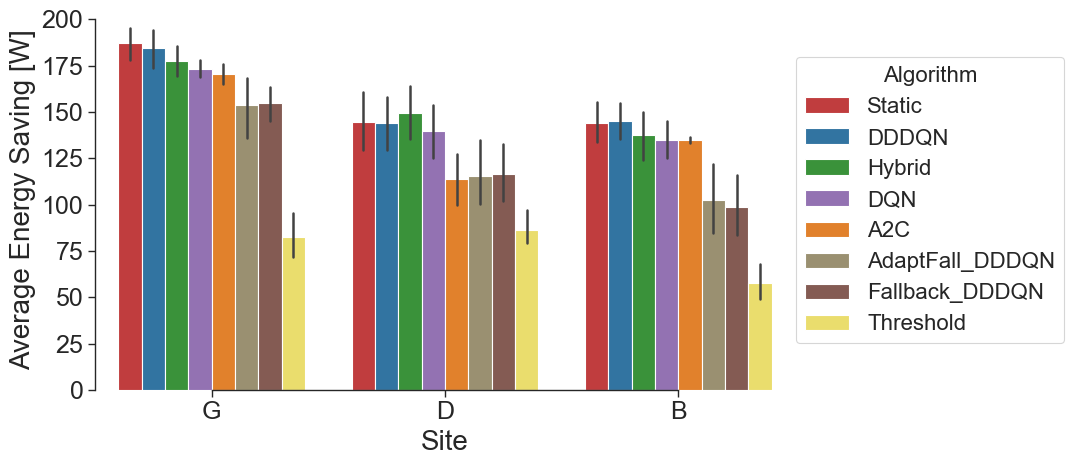

In [27]:

# Sort energy_savings DataFrame by Avg_Energy_Saving in descending order for plotting from best to worst
energy_savings = energy_savings.sort_values(by='Avg_Energy_Saving', ascending=False)

# Plotting Energy Savings by Site and Algorithm
plt.figure(figsize=(12, 5))
sns.barplot(data=energy_savings, x='Site', y='Avg_Energy_Saving', hue='Algorithm', palette=color_palette, order=energy_savings['Site'].unique())
#plt.title('Average Energy Savings by Site and Algorithm', fontsize=18)
plt.xlabel('Site', fontsize=20)
plt.ylabel('Average Energy Saving [W]', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title='Algorithm', fontsize=16, title_fontsize=16, loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.tight_layout()
sns.despine(trim=True)
plt.show()

In [25]:
def create_comparison_table(metrics_df):
    # Select columns of interest
    columns = ['Algorithm', 'Avg_Energy_Saving', 'Avg_Latency_After', 'Avg_Throughput_After']
    
    # Create a copy of the relevant data
    comparison_table = metrics_df[columns].copy()

    # Print the table without the index
    print(comparison_table.to_string(index=False))

    # Return the table as a DataFrame if you need further manipulation
    return comparison_table

In [26]:
create_comparison_table(overall_metrics)

Empty DataFrame
Columns: [Algorithm, Avg_Energy_Saving, Avg_Latency_After, Avg_Throughput_After]
Index: []


,Algorithm,Avg_Energy_Saving,Avg_Latency_After,Avg_Throughput_After
